In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('hranalytics\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check dataset information
print("Dataset Information:")
print(data.info())

# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Split the dataset into features (X) and target (y)
X = data.drop(['Attrition'], axis=1)  # Features
y = data['Attrition']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Explore the training data only
print("\nTraining Data Description:")
print(X_train.describe())
print("\nTraining Data Target Distribution:")
print(y_train.value_counts())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

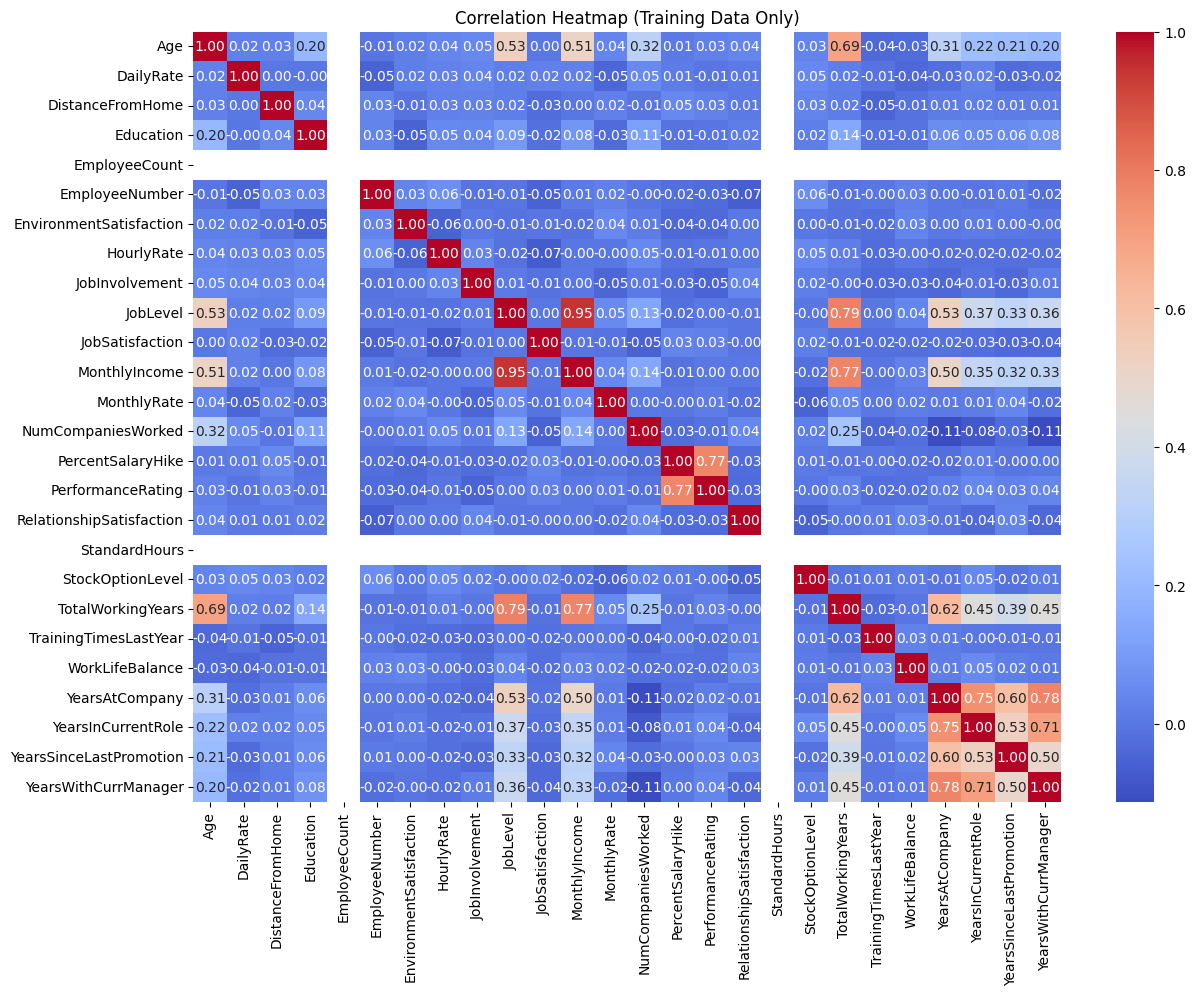

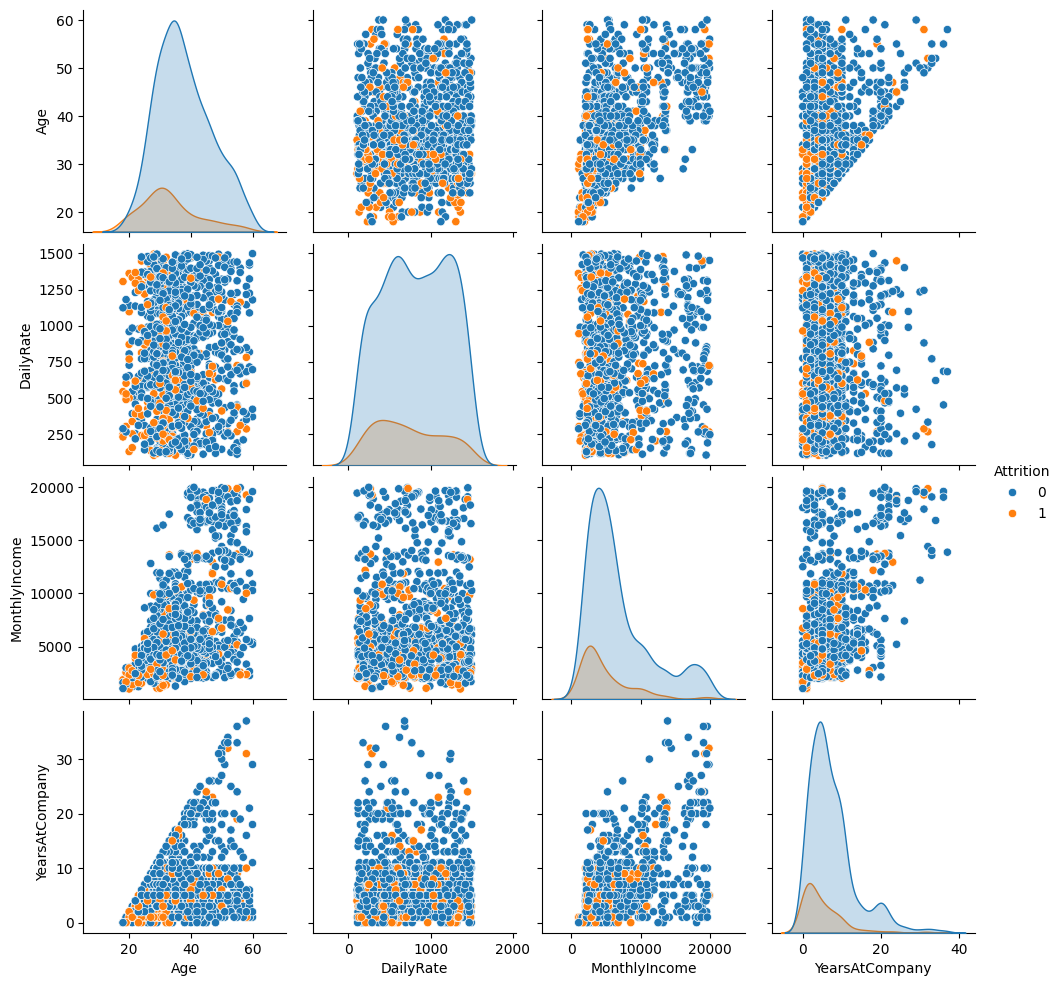

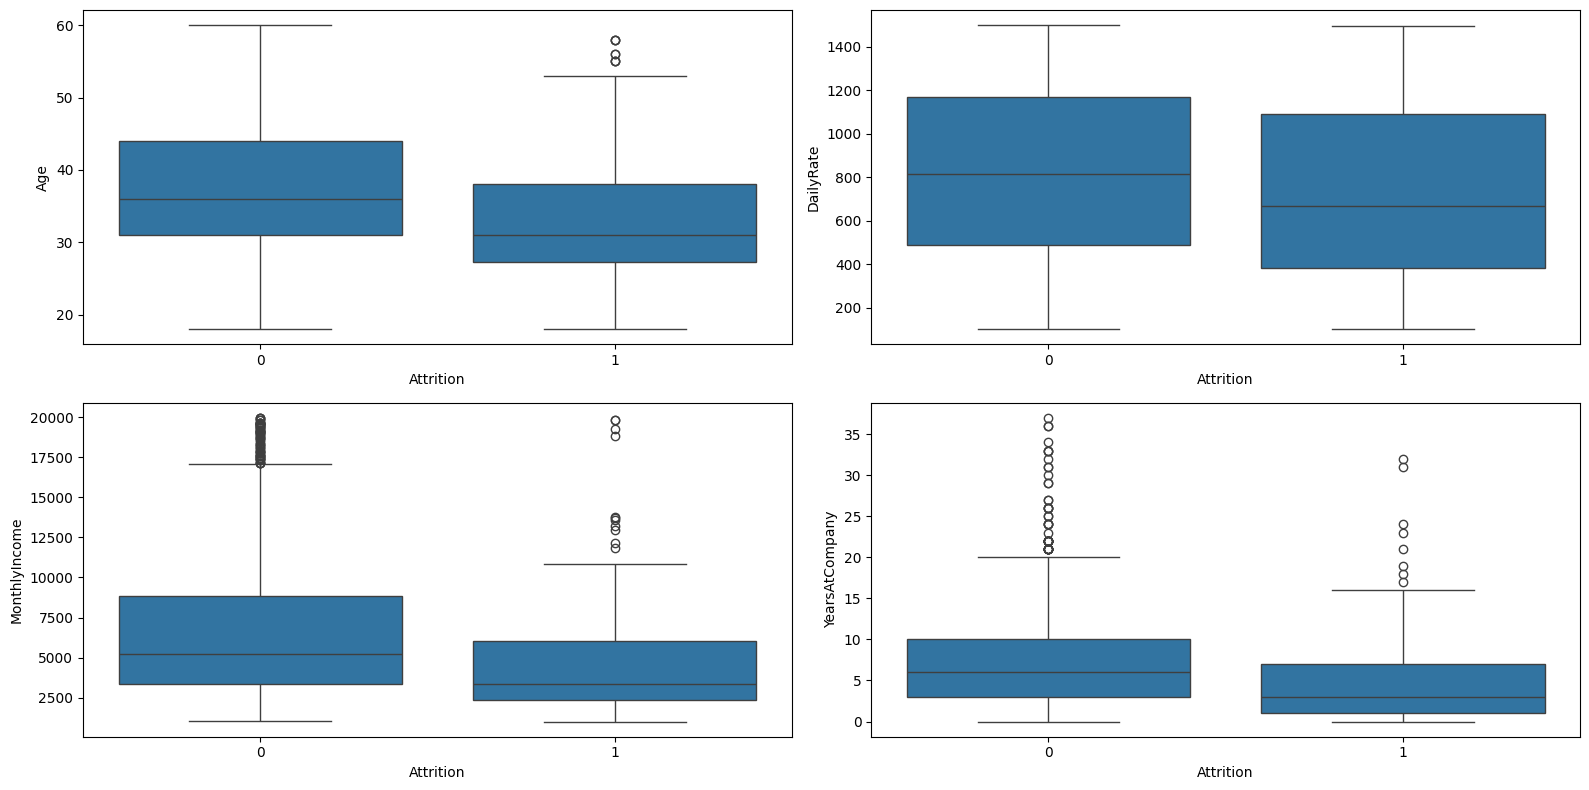

In [12]:
# Correlation heatmap for numeric features
plt.figure(figsize=(14, 10))
sns.heatmap(X_train[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Training Data Only)')
plt.show()

# Combine X_train and y_train for visualizations that need the target
train_data = pd.concat([X_train, y_train], axis=1)
train_data.rename(columns={y_train.name: 'Attrition'}, inplace=True)  # Rename target column for clarity

# Pairplot for selected features
selected_features = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany']
sns.pairplot(train_data[selected_features + ['Attrition']], hue='Attrition', diag_kind='kde')
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(16, 8))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Attrition', y=col, data=train_data)
plt.tight_layout()
plt.show()


In [4]:
# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly']
    }
}

# Models to train and evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=10000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True))
]



Logistic Regression - Best Hyperparameters:
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



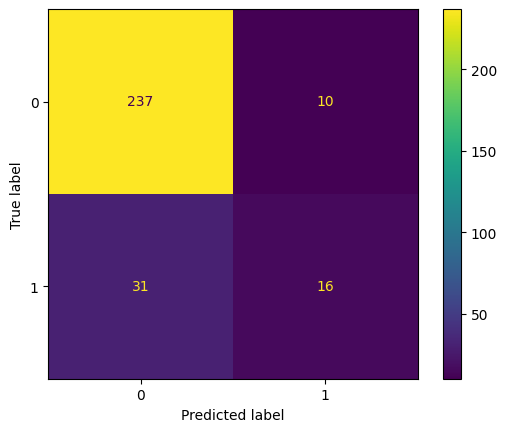

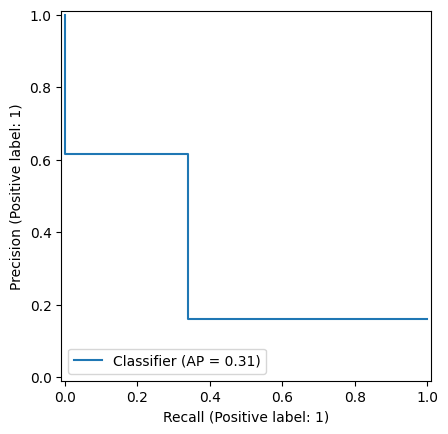

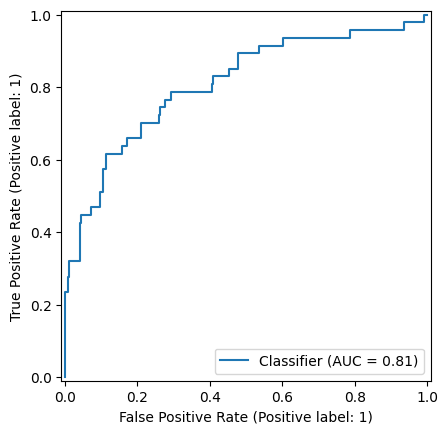


Random Forest - Best Hyperparameters:
{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



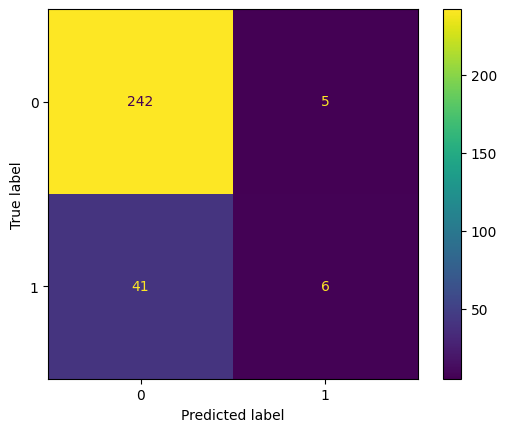

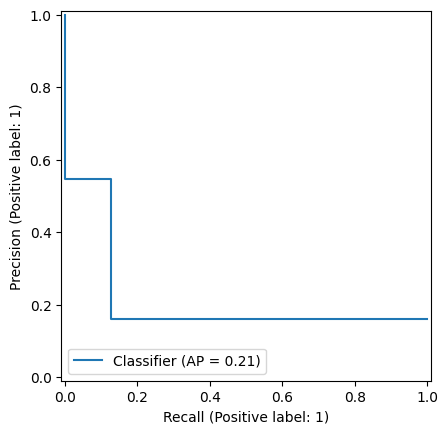

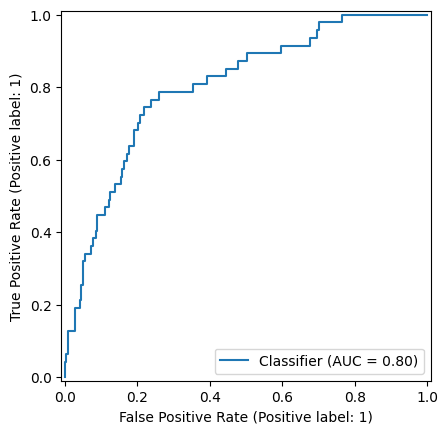


SVM - Best Hyperparameters:
{'classifier__C': 1, 'classifier__kernel': 'linear'}

Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.65      0.32      0.43        47

    accuracy                           0.86       294
   macro avg       0.77      0.64      0.68       294
weighted avg       0.85      0.86      0.84       294



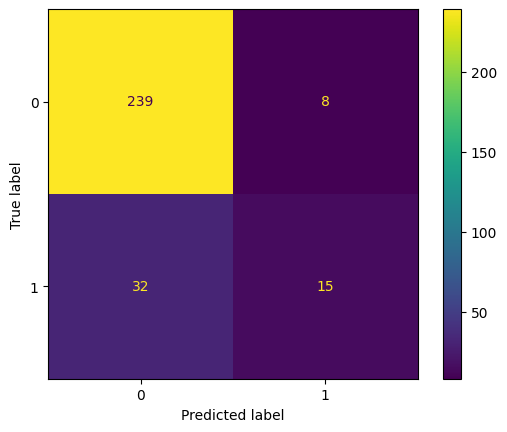

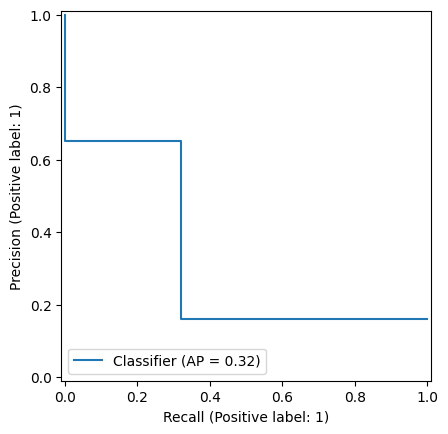

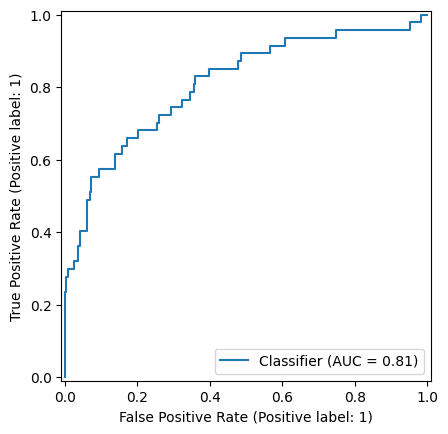


Model Evaluation Summary:
              APPROACH  ACCURACY  PRECISION    RECALL  F1-SCORE   ROC AUC
0  Logistic Regression  0.860544   0.749856  0.649970  0.679372  0.808338
1        Random Forest  0.843537   0.700289  0.553708  0.560052  0.802481
2                  SVM  0.863946   0.767046  0.643380  0.675676  0.809372


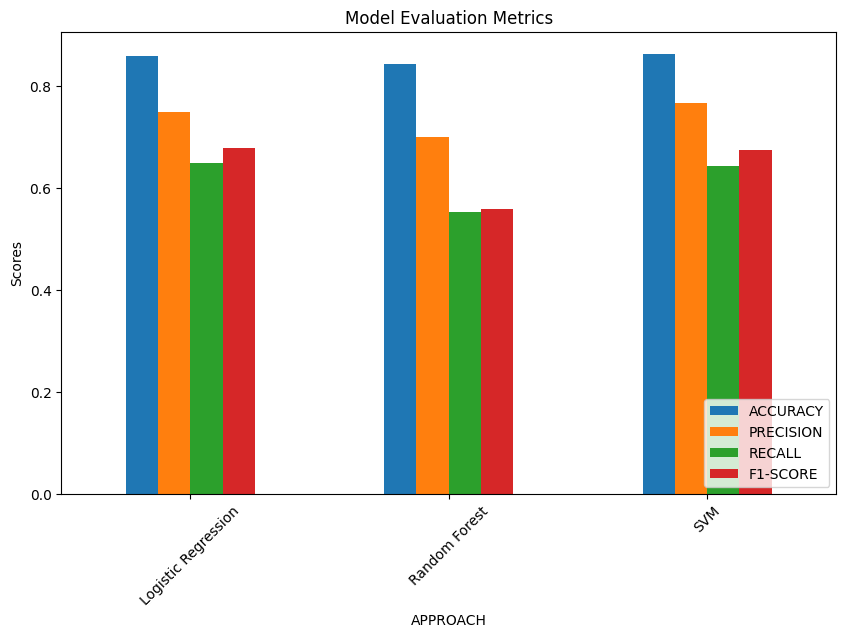

In [14]:
# Model evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
model_names = []

def train_and_evaluate_model_with_tuning(name, model, param_grid):
    # Define pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    # Best estimator and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"\n{name} - Best Hyperparameters:")
    print(best_params)
    
    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model.named_steps['classifier'], 'predict_proba') else None
    
    # Classification Report
    print(f"\nModel: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Append metrics
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc if roc_auc else "N/A")
    model_names.append(name)
    
    # Visualizations
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.show()

# Train and evaluate each model with hyperparameter tuning
for name, model in models:
    train_and_evaluate_model_with_tuning(name, model, param_grids[name])

# Evaluation Summary DataFrame
evaluation_data = {
    "APPROACH": model_names,
    "ACCURACY": accuracy_scores,
    "PRECISION": precision_scores,
    "RECALL": recall_scores,
    "F1-SCORE": f1_scores,
    "ROC AUC": roc_auc_scores
}
evaluation_df = pd.DataFrame(evaluation_data)

# Display the Evaluation DataFrame
print("\nModel Evaluation Summary:")
print(evaluation_df)

# Visualize metrics comparison
evaluation_df.set_index("APPROACH")[["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

Epoch 1/30


C:\Users\elpid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7977 - loss: 0.4779 - val_accuracy: 0.8401 - val_loss: 0.4097
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.3993 - val_accuracy: 0.8605 - val_loss: 0.3832
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3760 - val_accuracy: 0.8639 - val_loss: 0.3683
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.3634 - val_accuracy: 0.8605 - val_loss: 0.3503
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3119 - val_accuracy: 0.8741 - val_loss: 0.3471
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9042 - loss: 0.2726 - val_accuracy: 0.8707 - val_loss: 0.3565
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8865 - loss: 0.3015 - val_accuracy: 0.8707 - val_loss: 0.3464
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9007 - loss: 0.2718 - val_accuracy: 0.8776 - val_loss: 0.3474
Epo

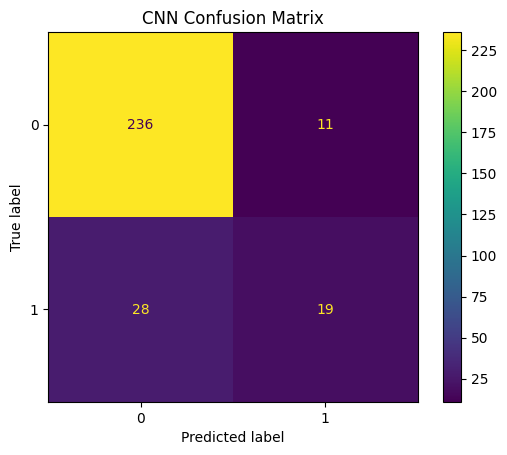

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessors for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert labels to one-hot encoding (needed for CNN output layer)
y_train_onehot = to_categorical(y_train, num_classes=2)
y_test_onehot = to_categorical(y_test, num_classes=2)

# Input dimensions for the CNN
input_dim = X_train_processed.shape[1]

# Build the CNN model
cnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train_processed, y_train_onehot,
                        validation_data=(X_test_processed, y_test_onehot),
                        epochs=30, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_processed, y_test_onehot, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions and performance metrics
y_pred_prob = cnn_model.predict(X_test_processed)
y_pred = np.argmax(y_pred_prob, axis=1)

# Display evaluation metrics
print("CNN Test Set Evaluation:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('CNN Confusion Matrix')
plt.show()
